In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline


In [5]:
%pwd
path5 = 'D:\\Python\\DataScience\\DataScience6105\\Module5'
path3 = 'D:\\Python\\DataScience\\DataScience6105\\Module3'
trn_df = pd.read_csv(f'{path5}/titanic_trn_4_ml.csv')
test_df = pd.read_csv(f'{path5}/titanic_test_4_ml.csv')
print(trn_df.shape)
print(test_df.shape)


(1100, 13)
(209, 13)


In [6]:
x_train = trn_df.drop('Survived', axis = 1)
y_train = trn_df['Survived']
x_test = test_df.drop('Survived', axis = 1)
y_test = test_df['Survived']

knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_train)
print(accuracy_score(y_train, y_pred))
y_pred_test = knn_model.predict(x_test)
print(accuracy_score(y_test, y_pred_test))


1.0
0.5406698564593302


In [7]:
knn_model_I = KNeighborsClassifier(n_neighbors = 5)
knn_model_I.fit(x_train, y_train)
y_pred_I = knn_model_I.predict(x_train)
print(accuracy_score(y_train, y_pred_I))
y_pred_test_I = knn_model_I.predict(x_test)
print(accuracy_score(y_test, y_pred_test_I))


0.7381818181818182
0.5454545454545454


In [8]:
knn_model_II = KNeighborsClassifier(n_neighbors = 3)
knn_model_II.fit(x_train, y_train)
y_pred_II = knn_model_II.predict(x_train)
print(accuracy_score(y_train, y_pred_II))
y_pred_test_II = knn_model_II.predict(x_test)
print(accuracy_score(y_test, y_pred_test_II))


0.8072727272727273
0.5550239234449761


                0   1
Not survived  113  88
Survived        5   3


Text(51.0, 0.5, 'predicted')

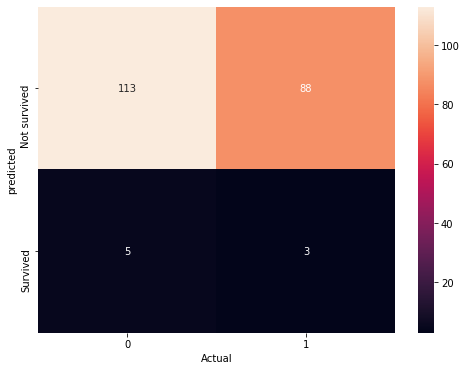

In [9]:
c_mat = confusion_matrix(y_test, y_pred_test_II)
c_mat_df = pd.DataFrame(c_mat)
c_mat_df.columns = ['Not survived', 'Survived']
c_mat_df = c_mat_df.T
print(c_mat_df)

plt.figure(figsize=(8, 6))
sns.heatmap(c_mat_df, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('predicted')


In [12]:
# true positives
tp = 113
#true negatives
tn = 3
#false positives
fp = 88
#false negatives
fn = 5

recall = 113 / (113 + 5)
precision = 113 / (113 + 88)
f_score = (2 * recall * precision) / (recall + precision)
print(recall)
print(precision)
print(f_score)
scores = classification_report(y_test,y_pred_test_II)
print(scores)


0.9576271186440678
0.5621890547263682
0.7084639498432602
              precision    recall  f1-score   support

           0       0.56      0.96      0.71       118
           1       0.38      0.03      0.06        91

    accuracy                           0.56       209
   macro avg       0.47      0.50      0.38       209
weighted avg       0.48      0.56      0.43       209



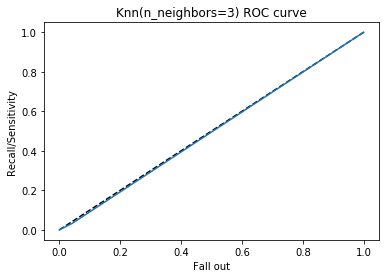

0.49529707580555044


In [13]:
rec, fall_out, thresholds = roc_curve(y_test,y_pred_test_II)
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='KNN')
plt.xlabel('Fall out')
plt.ylabel('Recall/Sensitivity')
plt.title('Knn(n_neighbors=3) ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_test_II))